# In-depth Analysis of Breast Cancer Dataset

<hr>

## Breast Cancer in US

In 2019, an estimated 268,600 new cases of invasive breast cancer will be diagnosed in women in the U.S. as well as 62,930 new cases of non-invasive (in situ) breast cancer. 62% of breast cancer cases are diagnosed at a localized stage, for which the 5-year survival rate is 99%. This year, an estimated 41,760 women will die from breast cancer in the U.S. Although rare, men get breast cancer too. The lifetime risk for U.S. men is about 1 in 1,000. An estimated 2,670 men will be diagnosed with breast cancer this year in the United States and approximately 500 will die. 1 in 8 women in the United States will develop breast cancer in her lifetime. Breast cancer is the most common cancer in American women, except for skin cancers. There are over 3.5 million breast cancer survivors in the United States. On average, every 2 minutes a woman is diagnosed with breast cancer in the United States. Female breast cancer represents 15.2% of all new cancer cases in the U.S.

Source : <a href="https://www.nationalbreastcancer.org/breast-cancer-facts#:~:text=In%202019%2C%20an%20estimated%20268%2C600,year%20survival%20rate%20is%2099%25." style="text-decoration: none;">NationalBreastCancer.org</a>

<hr>

## About Data Set

The datset has been obtained from Kaggle, the link is privided <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2" style="text-decoration: none;">HERE</a>. The dataset contains the information for the patients in Wisconsin suffering from Breast Cancer. 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34.

## Attribute Information
<ul>
    <li>ID Number</li>
    <li>Diagnosis (M = malignant, B = benign)</li>
    <li>Columns 3 - 32 Contains (The calulations have been performed using three metrics : Mean, Standard Error and Worst. Each section contains 10 columns, in total resulting in 30 columns.) : </li>
    <ol>
        <li>radius (mean of distances from center to points on the perimeter)</li>
        <li>texture (standard deviation of gray-scale values)</li>
        <li>perimeter</li>
        <li>area</li>
        <li>smoothness (local variation in radius lengths)</li>
        <li>compactness (perimeter^2 / area - 1.0)</li>
        <li>concavity (severity of concave portions of the contour)</li>
        <li>concave points (number of concave portions of the contour)</li>
        <li>symmetry</li>
        <li>fractal dimension ("coastline approximation" - 1)</li>
    </ol>
    
</ul>

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

<hr>

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

<hr>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read CSV File / DataSet
df = pd.read_csv('data.csv', index_col=False)

# 1. Cleaning Data

In [3]:
# View DataSet
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [4]:
# check null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# check for duplicate values
sum(df.duplicated())

0

In [6]:
# Get overview of how many unique values a column has.
def remove_unique(x):
    '''
    Author : Niladri Ghosh
    Email : niladri1406@gmail.com
    
    This function takes in a single argument X - which should be a data frame and then check for each and every column where 
    only single value exists in the whole column and then drop the whole column, finally print out the droppped columns.
    
    '''
    
    uni = x.nunique()
    uniq = pd.DataFrame({'variable':uni.index, 'unique_values':uni.values})
    for i,j in uniq.iterrows():
        if j['unique_values'] == 1:
            print([j.variable])
            x.drop([j.variable], axis = 1, inplace = True)

In [7]:
# remove columns with unique values and print out the names
remove_unique(df)

#### Since there are no columns with unique data, none of the columns have been dropped.

In [8]:
# remove the useless columns
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [9]:
# check shape of dataset
df.shape

(569, 31)

## Observations:

> The following details could be drawn after properly analysing the dataset :
><ul>
    <li>There are no null values in the dataset, other than the automated column Unnamed, we'll remove it anyways.</li>
    <li>No duplicate values present </li>
    <li>Each and every columns have proper data type assigned to them</li>
    <li>Column id contain id of patients and Unnamed: 32 column was generated automatically while reading the csv file there we will remove them as they are of no use.</li>
    <li>After cleaning out the minor issues, our dataset has 31. 
</ul>

__Since there are no issues in the datset. Therefor no cleaning is needed.__


# 2. Exploratory Data Analysis

In order to fully understand the dataset we have to check through each and every aspects of the data. We need to get the grasp of how the data is stored is there any relationship between data which could enhance our analysis.

## 2.1 Descriptive Statistics

In [10]:
# check diagnosis distribution
pd.DataFrame(df.groupby('diagnosis', axis=0).size(), columns=['# of occurence'])

,# of occurence
diagnosis,
B,357
M,212


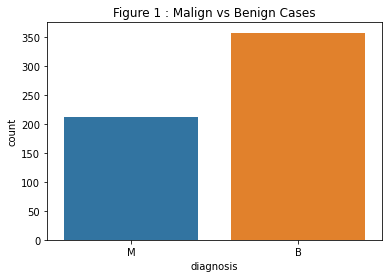

In [11]:
# histogram for count of different diagonis
sns.countplot(x="diagnosis", data=df).set(title='Figure 1 : Malign vs Benign Cases');

In [12]:
# check data disctribution
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Obsrvations
> We denote that there are 357 people who were diagonosed as Benign[B] (no cancer cell) and 212 people who were Malignant[M] (presence of cancer cells).

## 2.2 Visualisations

A mojor part of analysis is visualization as understanding a data by representing using a graph or chart is much easier than getting it from numbers. Therefor in this section we will plot these data to get much more insight from it.

#### Data Slicing

As the calculations have been performed using three metices, we would distribute the data into parts viz., mean, se and the worst. This would simplify our jobs.

In [13]:
# slicing and creating new dataframes
df_mean = df.iloc[:,np.r_[0:1,1:11]]
df_se = df.iloc[:,np.r_[0:1,11:21]]
df_worst = df.iloc[:,np.r_[0:1,21:31]]

In [14]:
# rename columns
def rename_columns(x):
    '''
    
    Author : Niladri Ghosh
    Email : niladri1406@gmail.com
    
    The function takes in a single argument, a dataframe and renames the columns to simple format.
    eg - if the column name is "radius_mean" it renames it to "radius" and if the item contains multiple
    "_" it will fetch the last "_" and remove it from there, for instance "fractal_dimention_mean" will be
    "fractal_dimention". Simply speaking it removes the characters after "_" including the "_".
    
    
    '''
    
    new_label = []
    for i in x.columns:
        if '_' in str(i):
            loca = i.rfind('_')
            new_label.append(i[:loca])
        else:
            new_label.append(i)
    x.columns = new_label

In [15]:
# rename each and every columns of all the sliced dataframes and storing to different csv files.
arr = [[df_mean,"data_mean"], [df_se,"data_se"], [df_worst,"data_worst"]]
for i,j in arr:
    rename_columns(i)
    i.to_csv(j+".csv", index=False)


## Through Density Plots

Each column of the dataframe is being observed, the value count / density of each data is being monitored for any patterns.

### Data Set : Mean

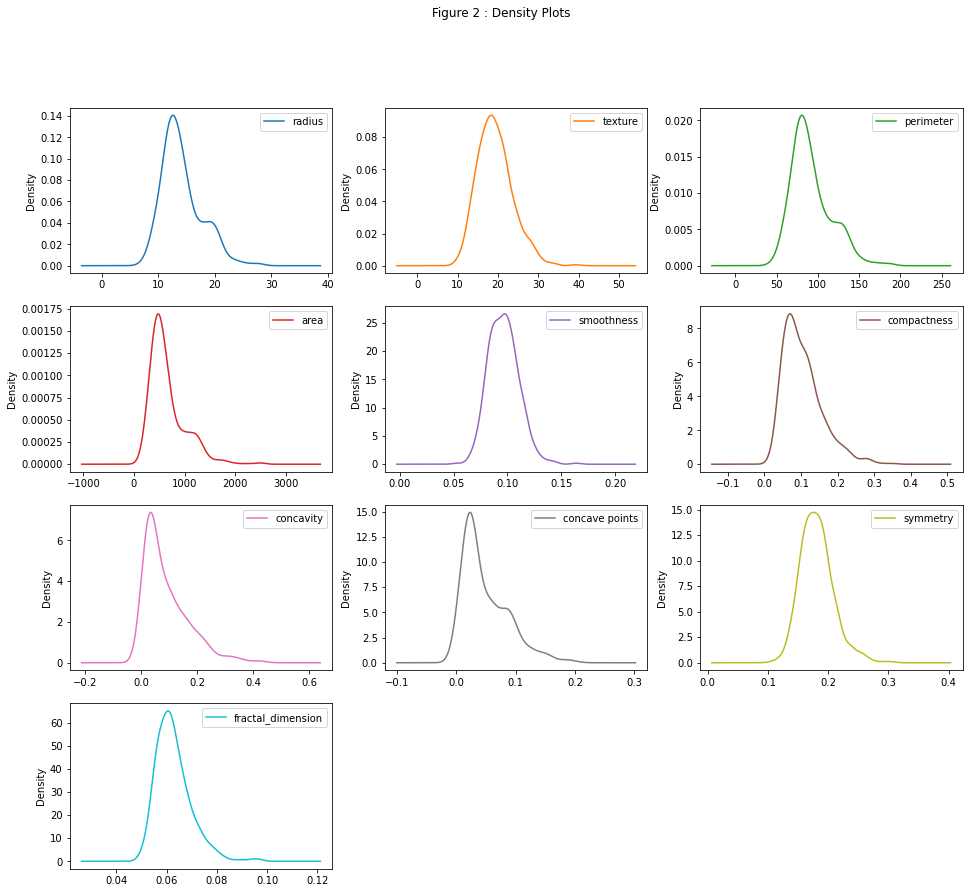

In [16]:
# plot density plot
density_mean=df_mean.plot(kind="density",title="Figure 2 : Density Plots", subplots=True, layout=(4,3), 
                          sharex=False, sharey=False, figsize=(16, 14));

### Data Set : Standard Error

In [17]:
# plot density plot
#density_se=df_se.plot(kind="density", subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(16, 14))

### Data Set : Worst / Largest (mean of three largest values)

In [18]:
# plot density plot
#density_worst=df_worst.plot(kind="density", subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(16, 14))

## Through Box Plots

Plotting box plots for each column to view the distribution of data overall.

### Data Set : Mean

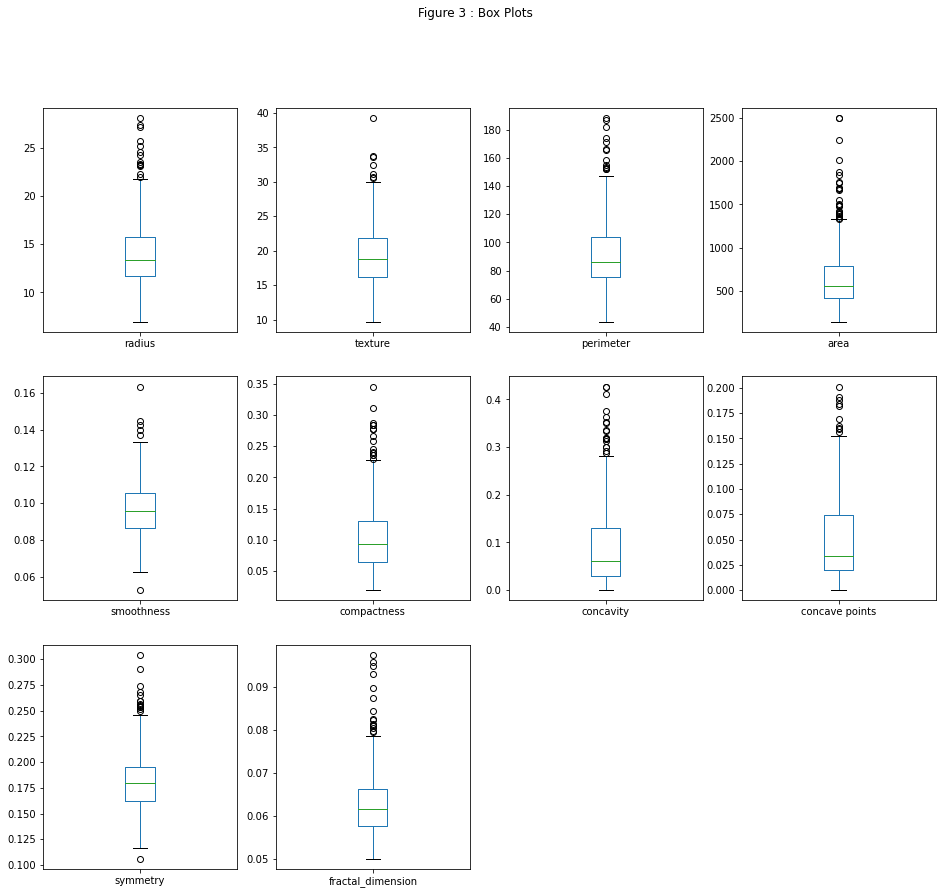

In [19]:
#box plot
box_mean=df_mean.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, 
                      figsize=(16,14), title="Figure 3 : Box Plots")

### Data Set : Standard Error

In [20]:
#box plot
#box_se=df_se.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(16,14))

### Data Set : Worst / Largest (mean of three largest values)

In [21]:
#box plot
#box_worst=df_worst.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(16,14))

### Observations

> We can observe a number of patterns from the above figures. The columns smoothness, symmetry and texture potray a similar to Gaussian distribution as it might come in handy as many of the ml techniques out there use a Gaussian distribution on input variables. We can also observe that columns concave points ans concavity resembles to a exponential distribution.

## Through PairPlot

To check whether there is a coorelation between malignant and benign values we'll be plotting PairPlots.

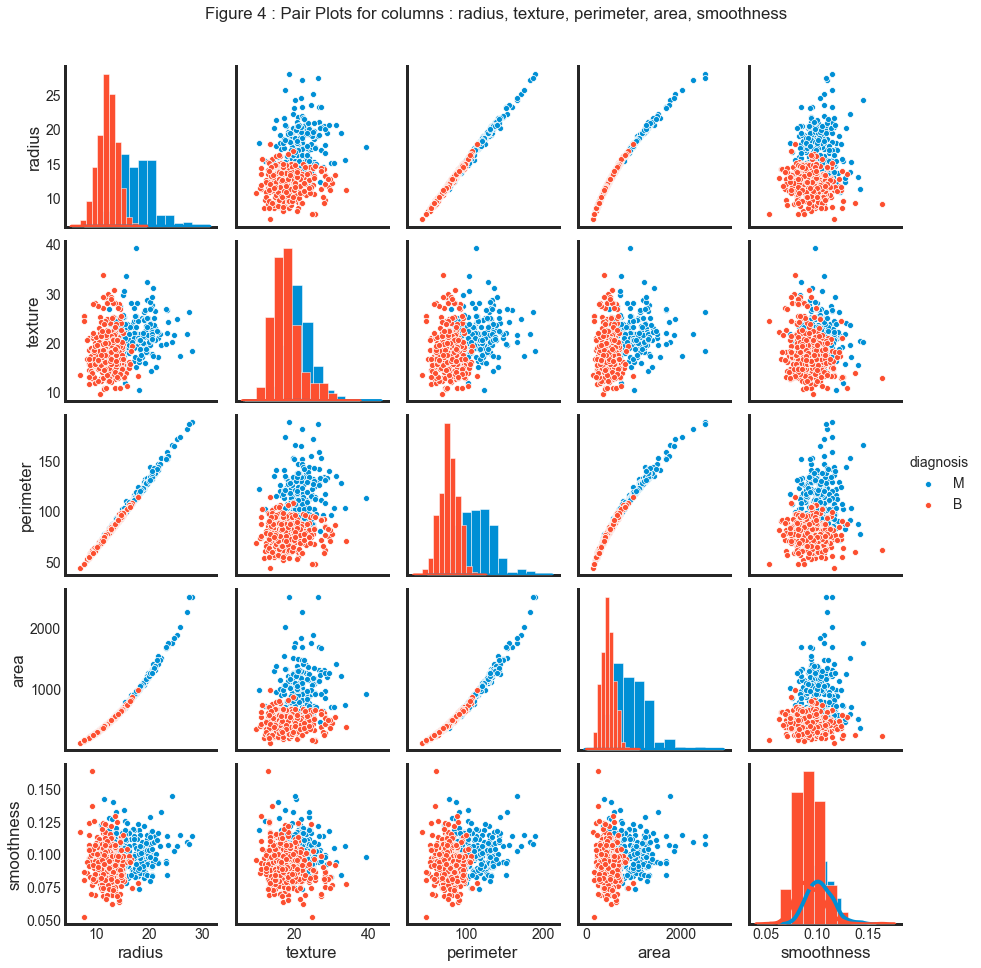

In [22]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.pairplot(df_mean[[df_mean.columns[0],df_mean.columns[1],df_mean.columns[2],df_mean.columns[3],
                      df_mean.columns[4],df_mean.columns[5]]],hue="diagnosis")
g = g.map_diag(plt.hist)
g = g.fig.suptitle("Figure 4 : Pair Plots for columns : radius, texture, perimeter, area, smoothness", y=1.06)

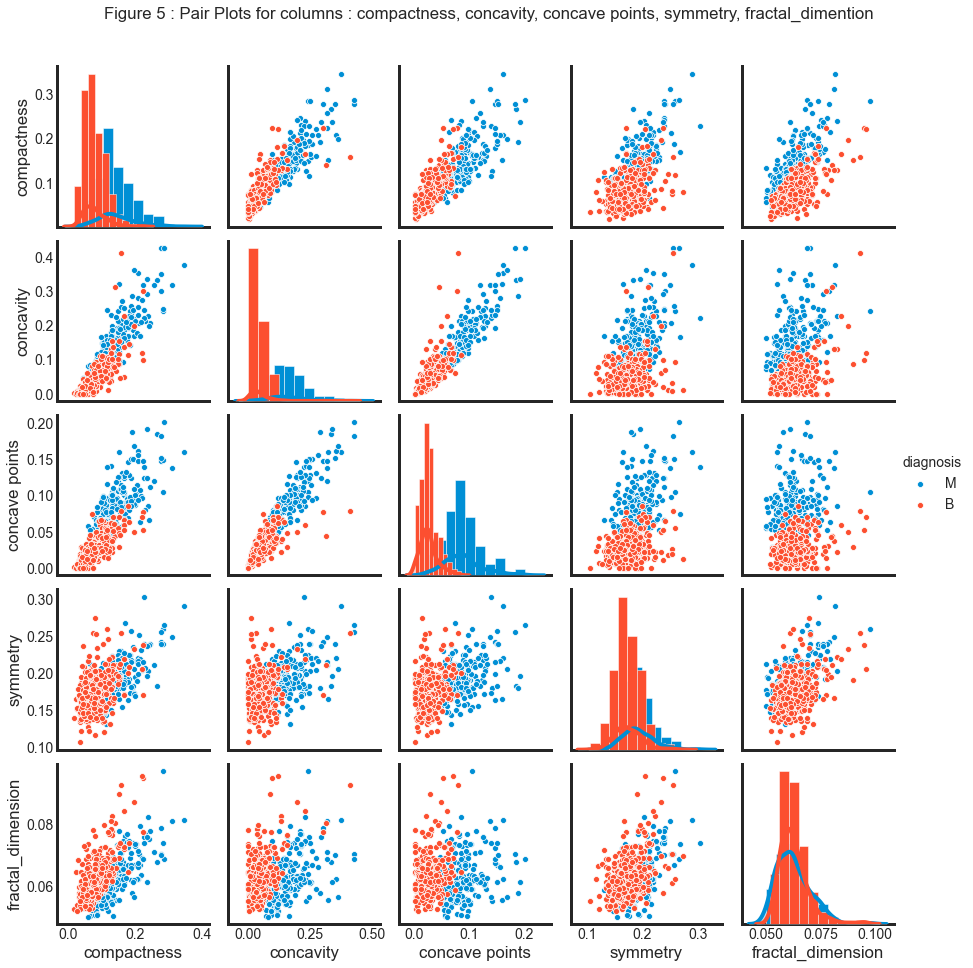

In [23]:
# remaining columns
plt.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.pairplot(df_mean[[df_mean.columns[0],df_mean.columns[6],df_mean.columns[7],df_mean.columns[8],
                      df_mean.columns[9],df_mean.columns[10]]],hue="diagnosis");
g = g.map_diag(plt.hist)
g = g.fig.suptitle("Figure 5 : Pair Plots for columns : compactness, concavity, concave points, symmetry, fractal_dimention", y=1.06)

## Through Matrix Plot

In order to check the actual correlation between different columns, we'll be plotting a Heat Map.

In [24]:
tc = df_mean.corr()

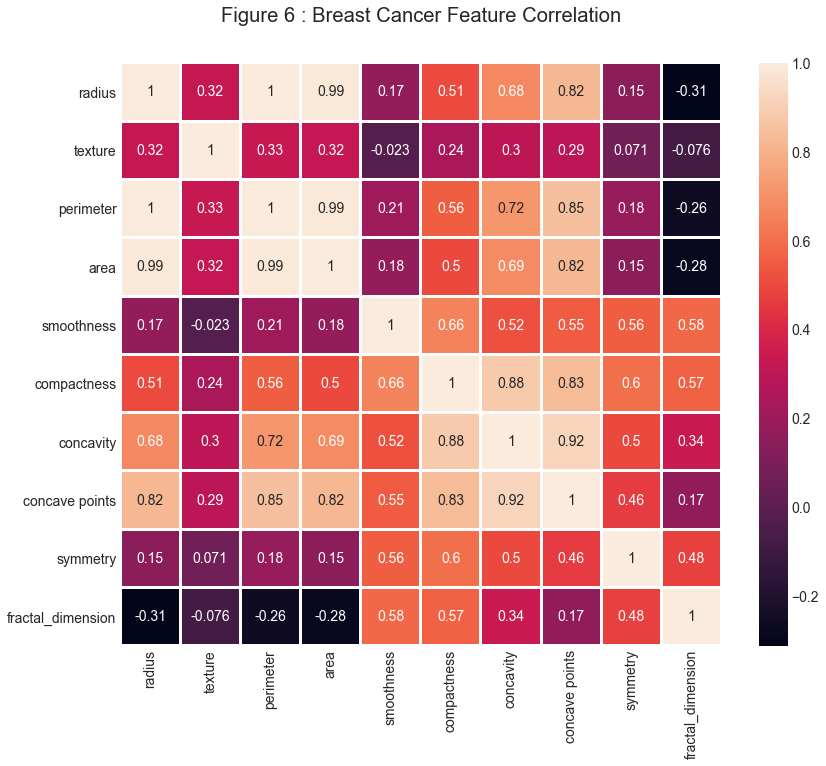

In [25]:
data, ax = plt.subplots(figsize=(12, 10))
plt.title('Figure 6 : Breast Cancer Feature Correlation', y=1.06)
heatmap_mean = sns.heatmap(tc, ax=ax, annot=True, fmt='.2g',linewidths=2)

### Observation

> After going through the plots we can see that there are no noticebly larger outliers, therefor no more cleaning needs to be performed. Also the values of radius, perimeter, area, compactness, concavity and concavity points are highly related to the malignancy of tumours, with rise of values the chances of tumours to get converted to cancer cell increases and the remaining columns doesn't show any such high interrelationship. Therefor the above values must be considered for the analysis. As goes for the correlation between variables, a strong correlation ( correaltion 0.75 and above ) is seen between radius, perimeter and area. Positive correlation is seen between cancavity and area, cancavity and perimeter, generally correlation of 0.5 to 0.75 and negative correlation is also present, (radius, perimeter and area ) and fractal dimention, as expected as area, radius and perimeter have a very high correlation. 


# Conclusion

The main point of an analysis is to ask the appropriate questions. Here are the following questions that has been provided by me after brainstorming through the dataset.

### Q1. Does increase in the size leads to critical situation ( malign diagnosis ) ?

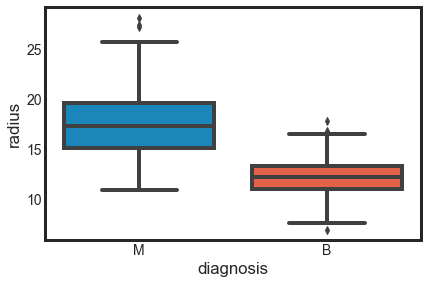

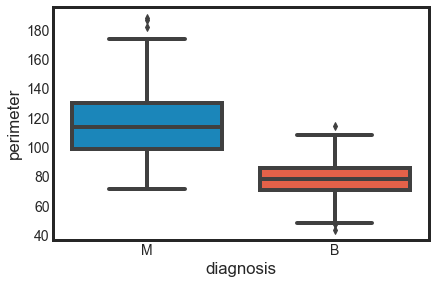

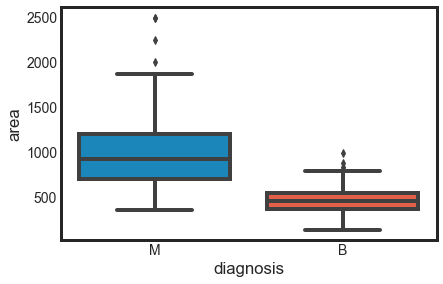

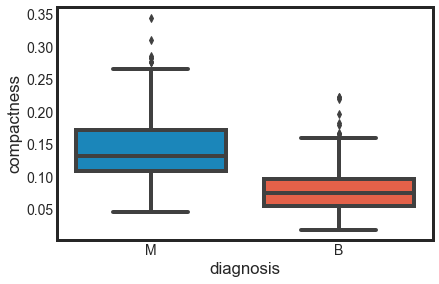

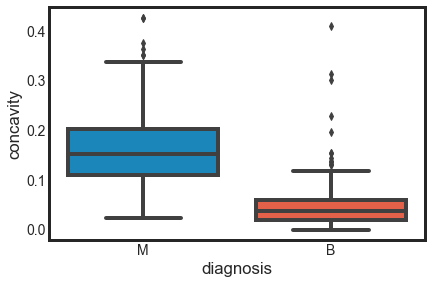

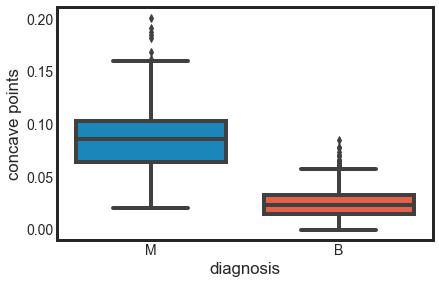

In [26]:
# Box plots
for col in df_mean.columns:
    if col == "radius" or col == "perimeter" or col == "area" or col == "compactness" or col == "concavity" or col == "concave points":
        plt.figure()
        sns.boxplot(x="diagnosis", y=col, data=df_mean)
    else:
        pass

### Answer : 
>We go through the mean values for both Malign and Benign cases and see a pattern that the values are always higher for malign diagnosis which can be verified through the box plots, blue ones are malign and orange are benign. 

### Q2. What factors are important in pridicting the diagnosis of the case to be malign ?

### Answer : 
>From __Figure 4 and 5__ we can observe from the scatterplots that  __radius, perimeter, area, compactness, concavity and concavity points__ are the variables which are highly related to malignacy as we can inspect the graphs and see that they have linear correlation.

### Q3. Are there any threshold values above which a case could be concidered critical ?

In [27]:
# check mean values for malign cases ***** CANCER PATIENTS *****
df_mean[df_mean['diagnosis']=='M'].describe(percentiles=[.05,.1,.25,.50,.75,.8,.9,.95])

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960
5%,12.803000,16.055500,84.679500,504.905000,0.084016,0.066981,0.053345,0.033912,0.154865,0.053012
10%,13.610000,17.252000,88.424000,573.130000,0.087803,0.084284,0.080349,0.051947,0.159040,0.054196
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075
80%,20.154000,24.438000,132.480000,1249.400000,0.113860,0.186420,0.213460,0.110180,0.213060,0.068770


In [28]:
# check mean values for benign cases  ***** NORMAL CASE *****
df_mean[df_mean['diagnosis']=='B'].describe(percentiles=[.05,.1,.25,.50,.75,.8,.9,.95])

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850
5%,9.039400,12.838000,58.966000,248.220000,0.073542,0.037724,0.001534,0.003234,0.137980,0.055018
10%,9.726600,13.308000,61.584000,288.860000,0.077122,0.042916,0.007406,0.006983,0.145400,0.055958
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760
80%,13.648000,20.668000,87.872000,572.200000,0.103260,0.106800,0.067348,0.037088,0.193320,0.066754


### Answer :
>From the above results we can see that the mean values for both malign and benign cases are provided. Malign cases are concidered critical or severe whereas benign are normal cases. Since we have concidered the factors __radius, perimeter, area, compactness, concavity and concavity points__ of utmost importance, we'll be analyzing those. For the size of radius we can observe that for normal case that 95% of the cases are under 14 (approx) but we can also see that 10% of the malign cases are below 14 (approx), therefor no assusmption could be made directly based on single number. Similarly for each factor this issue arrises there for we need a prediction model to analyse the dataset with interrelation.